In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, cross_val_predict, validation_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('./data_train.csv')
train.head()

,ho,khac_dam,kho_khe,kho_tho,nang_nguc,mrc,thuoc_la,mui_hong,tim,phoi,nhom
0,2,2,2,1,1,3,1,0,0,2,D
1,1,1,0,0,1,1,1,0,0,2,A
2,0,0,1,1,0,2,1,0,0,2,B
3,2,2,2,2,0,2,1,0,0,3,D
4,2,2,1,2,0,2,1,0,0,3,D


In [ ]:
features = ['ho','khac_dam','kho_khe','kho_tho','nang_nguc','mrc','thuoc_la','mui_hong','tim','phoi']
y = train['nhom'].copy()
X = train[features].copy()
X = pd.get_dummies(X)
first_imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
X = pd.DataFrame(first_imputer.fit_transform(X))
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1,test_size=0.2)

In [ ]:
def AccuracyTracker(Xtrain,Xtest,ytrain,ytest,n):
    model = DecisionTreeClassifier(max_leaf_nodes=n,random_state=1)
    model.fit(Xtrain,ytrain)
    print(n,accuracy_score(ytest,model.predict(Xtest)))
for i in range(2,20):
    AccuracyTracker(Xtrain,Xtest,ytrain,ytest,i)
model = DecisionTreeClassifier(max_leaf_nodes=8,random_state=1)
model.fit(Xtrain,ytrain)
print("--")
print("(Test_size: 20%, Train_size: 80%) from _train.csv")
print("Decision Tree Classifier's accuracy: ", accuracy_score(ytest,model.predict(Xtest)))
print("--")

2 0.5555555555555556
3 0.5555555555555556
4 0.7777777777777778
5 0.8888888888888888
6 0.8888888888888888
7 0.8888888888888888
8 0.7777777777777778
9 0.7777777777777778
10 0.7777777777777778
11 0.7777777777777778
12 0.7777777777777778
13 0.7777777777777778
14 0.7777777777777778
15 0.7777777777777778
16 0.7777777777777778
17 0.7777777777777778
18 0.7777777777777778
19 0.7777777777777778
--
(Test_size: 20%, Train_size: 80%) from _train.csv
Decision Tree Classifier's accuracy:  0.7777777777777778
--


In [ ]:
cv_results = cross_validate(model, X, y, cv=5)
sorted(cv_results.keys())
cv_results['test_score']

array([0.88888889, 0.75      , 0.75      , 0.75      , 0.75      ])

In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.11)


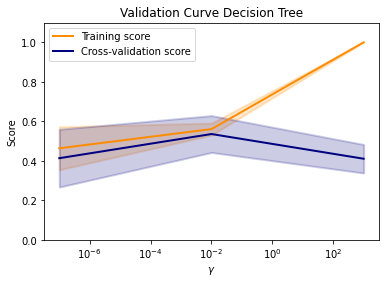

In [ ]:
param_range = np.logspace(-7, 3, 3)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("Validation Curve Decision Tree")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

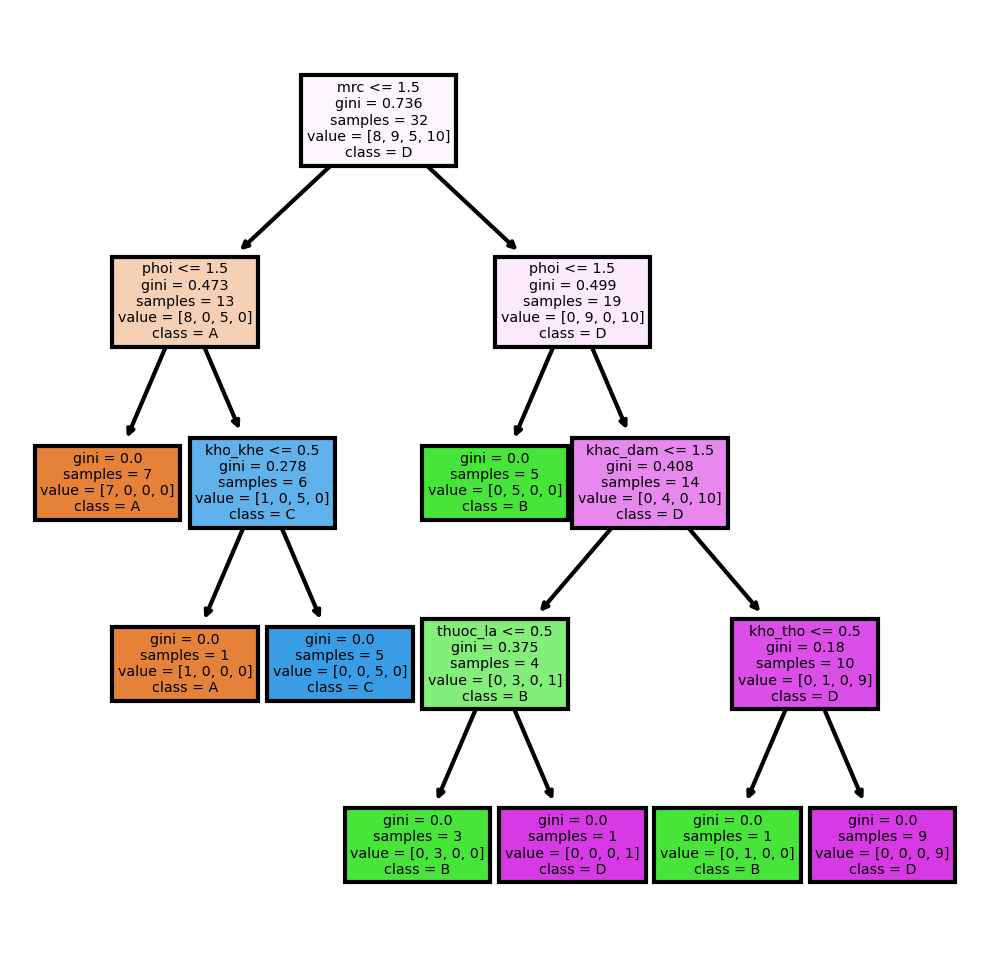

In [ ]:
cn=['A','B','C','D']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = features,
               class_names= cn,
               filled = True);